In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

In [2]:
with open('../output/logs/qalexnet_fp_rb8_MSGD_cifar100.json', 'r') as jf:
    json_str = json.load(jf)
json_str.keys()

dict_keys(['val_acc', 'lr', 'val_loss', 'qwl', 'qfl', 'perm', 'res', 'lb', 'name', 'sp'])

/media/lorenz/Volume/ubuntu/anaconda3/envs/marvin2/lib/python3.7/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/media/lorenz/Volume/ubuntu/anaconda3/envs/marvin2/lib/python3.7/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


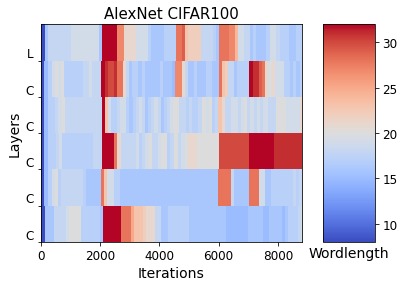

/media/lorenz/Volume/ubuntu/anaconda3/envs/marvin2/lib/python3.7/site-packages/ipykernel_launcher.py:100: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/media/lorenz/Volume/ubuntu/anaconda3/envs/marvin2/lib/python3.7/site-packages/ipykernel_launcher.py:100: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


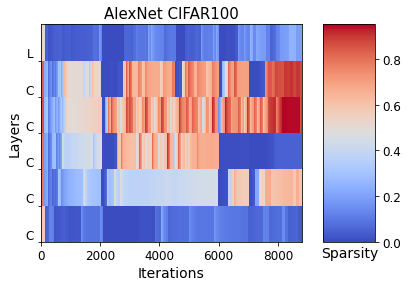

/media/lorenz/Volume/ubuntu/anaconda3/envs/marvin2/lib/python3.7/site-packages/ipykernel_launcher.py:118: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/media/lorenz/Volume/ubuntu/anaconda3/envs/marvin2/lib/python3.7/site-packages/ipykernel_launcher.py:118: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


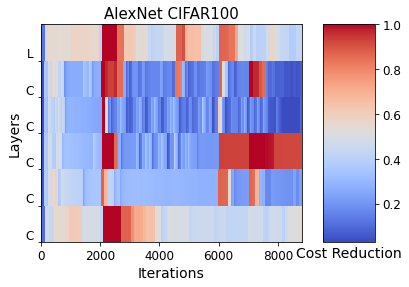

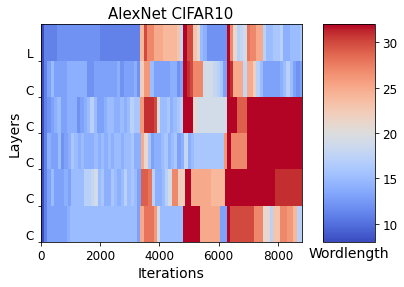

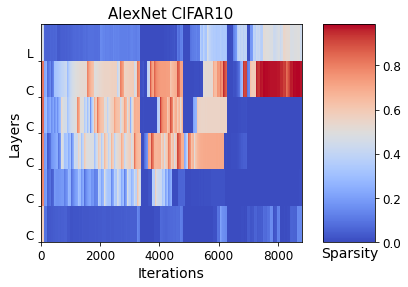

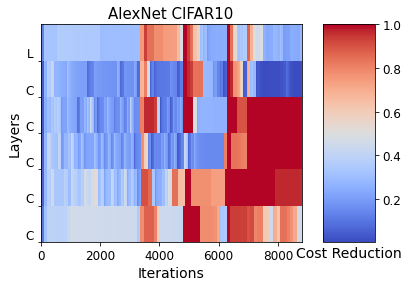

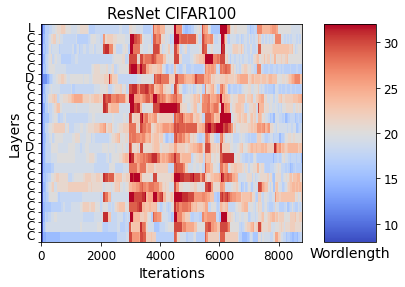

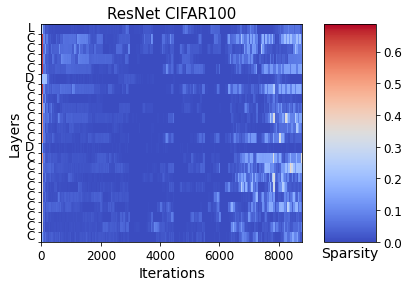

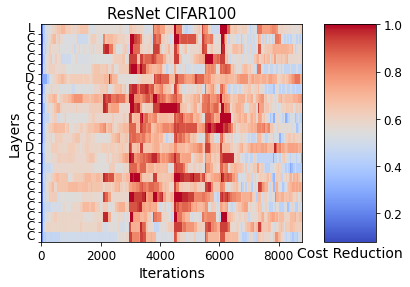

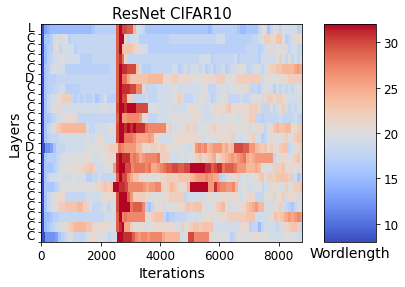

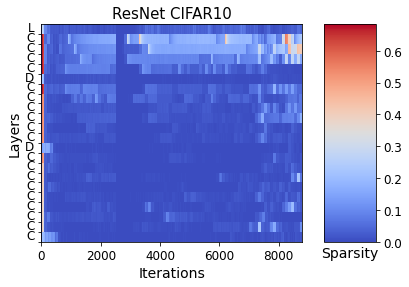

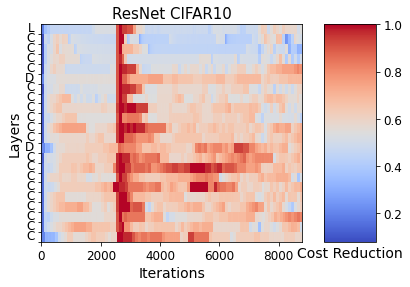

In [172]:
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


def shortcuts(name):
    shortcut = 'UNKOWN'
    if "conv" in name.lower(): shortcut = "C"
    elif "linear" in name.lower() or "fc" in name.lower(): shortcut = "L"
    elif "downsample" in name.lower(): shortcut = "D"
    elif "bn" in name.lower(): shortcut = "BN"
    return shortcut


expdict = {
    'AlexNet CIFAR100' : '../output/logs/qalexnet_fp_rb8_MSGD_cifar100.json',
    'AlexNet CIFAR10' : '../output/logs/qalexnet_fp_rb4_MSGD_cifar10.json',
    'ResNet CIFAR100' : '../output/logs/qresnet_fp_rb8_MSGD_cifar100.json',
    'ResNet CIFAR10' : '../output/logs/qresnet_fp_rb8_MSGD_cifar10.json'
}

for exp in expdict:
    with open(expdict[exp], 'r') as jf:
        json_str = json.load(jf)

    qwl = []
    for i, iteration in enumerate(json_str['qwl']):
        #print(iteration)
        layers = [layer for layer in iteration]
        names = [shortcuts(layer) for layer in json_str['name'][i]]
        qwl.append(layers)
    qwl = np.array(qwl).T

    sp = []
    for i, iteration in enumerate(json_str['sp']):
        #print(iteration)
        layers = [layer for layer in iteration]
        names = [shortcuts(layer) for layer in json_str['name'][i]]
        sp.append(layers)
    sp = np.array(sp).T

    cs = []
    for i, iteration in enumerate(json_str['sp']):
        #print(iteration)
        layers_sp = [1.0-layer for layer in iteration]
        layers_qwl = [layer/32 for layer in json_str['qwl'][i]]
        names = [shortcuts(layer) for layer in json_str['name'][i]]
        cs.append(np.multiply(layers_sp,layers_qwl))
    cs = np.array(cs).T

    
    ax = plt.subplot()
    im = ax.pcolormesh(qwl, cmap='coolwarm')
    plt.yticks(np.arange(len(names)), names, va='bottom')
    plt.xlabel('Iterations')
    plt.ylabel('Layers')
    plt.title(exp)
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="20%", pad=0.3)
    plt.colorbar(im, cax=cax)
    plt.xlabel('Wordlength')
    fname = "{}_qwl.png".format(expdict[exp].split("/")[-1].split(".")[:-1])
    fname = fname.replace('[', '').replace(']','').replace("'",'')
    plt.savefig(fname=fname, dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    plt.show()

    ax = plt.subplot()
    im = ax.pcolormesh(sp, cmap='coolwarm')
    plt.yticks(np.arange(len(names)), names, va='bottom')
    plt.xlabel('Iterations')
    plt.ylabel('Layers')
    plt.title(exp)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="20%", pad=0.3)
    plt.colorbar(im, cax=cax)
    plt.xlabel('Sparsity')
    fname = "{}_sp.png".format(expdict[exp].split("/")[-1].split(".")[:-1])
    fname = fname.replace('[', '').replace(']','').replace("'",'')
    plt.savefig(fname=fname, dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    plt.show()

    ax = plt.subplot()
    im = ax.pcolormesh(cs, cmap='coolwarm')
    plt.yticks(np.arange(len(names)), names, va='bottom')
    plt.xlabel('Iterations')
    plt.ylabel('Layers')
    plt.title(exp)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="20%", pad=0.3)
    plt.colorbar(im, cax=cax)
    plt.xlabel('Cost Reduction')
    fname = "{}_cr.png".format(expdict[exp].split("/")[-1].split(".")[:-1])
    fname = fname.replace('[', '').replace(']','').replace("'",'')
    plt.savefig(fname=fname, dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    plt.show()

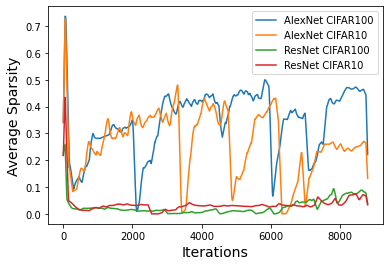

In [184]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def smooth(y, box_pts):
    #https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

expdict = {
    'AlexNet CIFAR100' : '../output/logs/qalexnet_fp_rb8_MSGD_cifar100.json',
    'AlexNet CIFAR10' : '../output/logs/qalexnet_fp_rb4_MSGD_cifar10.json',
    'ResNet CIFAR100' : '../output/logs/qresnet_fp_rb8_MSGD_cifar100.json',
    'ResNet CIFAR10' : '../output/logs/qresnet_fp_rb8_MSGD_cifar10.json'
}

for exp in expdict:
    with open(expdict[exp], 'r') as jf:
        json_str = json.load(jf)
        
    sp = []
    for iteration in json_str['sp']:
        #print(iteration)
        layers = [layer for layer in iteration]
        sp.append(sum(layers)/len(layers))
    sp = np.array(sp).T
    plt.plot(smooth(sp, 100), label=exp)
plt.ylabel('Average Sparsity')
plt.xlabel('Iterations')
plt.legend()
plt.show()

/media/lorenz/Volume/ubuntu/anaconda3/envs/marvin2/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/media/lorenz/Volume/ubuntu/anaconda3/envs/marvin2/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


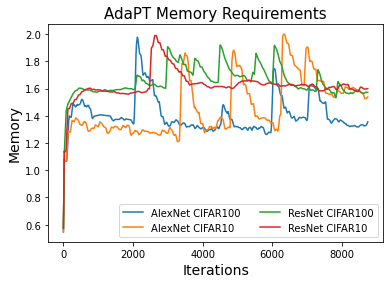

In [212]:
for exp in expdict:
    c = []
    with open(expdict[exp], 'r') as jf:
        json_str = json.load(jf)
        for i, iteration in enumerate(json_str['sp']):
            a = sum(iteration)/len(iteration)
            b = sum(json_str['qwl'][i])/len(json_str['qwl'][i])/32
            c.append(1.0+(1.0-a)*b)
        plt.plot(smooth(c, 50)[:-50], label=exp)

plt.legend(ncol=2)
plt.title('AdaPT Memory Requirements')
plt.xlabel('Iterations')
plt.ylabel('Memory')
fname = "adapt_all_mem.png"
plt.savefig(fname=fname, dpi=300, facecolor='w', edgecolor='w',
    orientation='portrait', papertype=None, format='png',
    transparent=False, bbox_inches=None, pad_inches=0.1,
    frameon=None, metadata=None)
plt.show()

dict_keys(['val_acc', 'lr', 'val_loss', 'qwl', 'qfl', 'perm', 'res', 'lb', 'name', 'sp'])
8800
dict_keys(['val_acc', 'lr', 'val_loss', 'qwl', 'qfl', 'perm', 'res', 'lb', 'name', 'sp'])
8800
dict_keys(['val_acc', 'lr', 'val_loss', 'qwl', 'qfl', 'perm', 'res', 'lb', 'name', 'sp'])
8800
dict_keys(['val_acc', 'lr', 'val_loss', 'qwl', 'qfl', 'perm', 'res', 'lb', 'name', 'sp'])
8800


/media/lorenz/Volume/ubuntu/anaconda3/envs/marvin2/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
/media/lorenz/Volume/ubuntu/anaconda3/envs/marvin2/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later


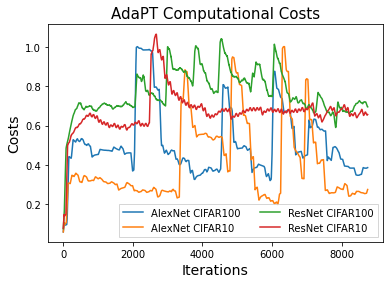

"\nwith open('../qalexnet_fp_rb4_MSGD_cifar10_perfmodel_madds.json', 'r') as jf:\n    json_str = json.load(jf)\nc = []\noffset = 6#int(len(json_str['madds_q'])/num_iters)\nfor i in range(0, len(json_str['madds_q']), offset):\n    c.append(sum(json_str['madds_q'][i:i+offset])/sum(json_str['madds'][i:i+offset]))\nplt.plot(c, label='AlexNet CIFAR100')\nplt.show()\n"

In [211]:
expdict2 = {
    'AlexNet CIFAR100' : '../qalexnet_fp_rb8_MSGD_cifar100_perfmodel_madds.json',
    'AlexNet CIFAR10' : '../qalexnet_fp_rb4_MSGD_cifar10_perfmodel_madds.json',
    'ResNet CIFAR100' : '../qresnet_fp_rb8_MSGD_cifar100_perfmodel_madds.json',
    'ResNet CIFAR10' : '../qresnet_fp_rb8_MSGD_cifar10_perfmodel_madds.json'
}

for exp in expdict2:
    with open(expdict2[exp], 'r') as jf:
        json_str2 = json.load(jf)
    with open(expdict[exp], 'r') as jf:
        json_str = json.load(jf)
    print(json_str.keys())
    offset = len(json_str['qwl'])
    c = []
    offset = int(len(json_str2['madds_q'])/num_iters)
    for i in range(0, len(json_str2['madds_q']), offset):
        c.append(sum(json_str2['madds_q'][i:i+offset])/sum(json_str2['madds'][i:i+offset]))
    
    
    plt.plot(smooth(c, 50)[:-50], label=exp)
    print(len(c))
plt.legend(ncol=2, fancybox=False)
plt.title('AdaPT Computational Costs')
plt.ylabel('Costs')
plt.xlabel('Iterations')
fname = "adapt_all_costs.png"
plt.savefig(fname=fname, dpi=300, facecolor='w', edgecolor='w',
    orientation='portrait', papertype=None, format='png',
    transparent=False, bbox_inches=None, pad_inches=0.1,
    frameon=None, metadata=None)
plt.show()
'''
with open('../qalexnet_fp_rb4_MSGD_cifar10_perfmodel_madds.json', 'r') as jf:
    json_str = json.load(jf)
c = []
offset = 6#int(len(json_str['madds_q'])/num_iters)
for i in range(0, len(json_str['madds_q']), offset):
    c.append(sum(json_str['madds_q'][i:i+offset])/sum(json_str['madds'][i:i+offset]))
plt.plot(c, label='AlexNet CIFAR100')
plt.show()
'''

In [42]:
all_results = []
header = ["layer", "qwl", "res", "qfl", "lb", "experiment"]

with open('../output/logs/qalexnet_fp_rb8_MSGD_cifar100.json', 'r') as jf:
    json_str = json.load(jf)
    print(len(json_str))
for iteration in json_str:
    for layer in iteration:
        all_results.append(list(layer.values()))
        all_results[-1].append("qalexnet_c10")
        
with open('../output/logs/qalexnet_fp_rb8_MSGD_cifar100.json', 'r') as jf:
    json_str = json.load(jf)
    print(len(json_str))
for iteration in json_str:
    for layer in iteration:
        all_results.append(list(layer.values()))
        all_results[-1].append("qalexnet_c100")
'''       
with open('../data/qresnet_fp_MSGD_cifar10.json', 'r') as jf:
    json_str = json.load(jf)
for iteration in json_str:
    for layer in iteration:
        all_results.append(list(layer.values()))
        all_results[-1].append("qresnet_c10")
        
with open('../data/qresnet_fp_MSGD_cifar100.json', 'r') as jf:
    json_str = json.load(jf)
for iteration in json_str:
    for layer in iteration:
        all_results.append(list(layer.values()))
        all_results[-1].append("qresnet_c100")
'''        

10


AttributeError: 'str' object has no attribute 'values'

In [ ]:
all_results = pd.DataFrame(all_results, columns=header)
all_results

In [ ]:
plt.figure(figsize=(4, 8))

ranges = [32, 28, 24, 22, 20, 18, 16, 14, 12]

colors = sns.color_palette("rocket_r", n_colors=len(ranges)+1)

labels = []
total = all_results.groupby('experiment')['qwl'].count().reset_index()

bar1 = sns.barplot(x="experiment",  y="qwl", data=total, color=colors[0])
l = mpatches.Patch(color=colors[0], label='qwl: {}'.format(32))
labels.append(l)
    

for i, r in enumerate(ranges):
    qwl = all_results[(all_results['qwl']<r)].groupby('experiment')['qwl'].count().reset_index()
    sns.barplot(x="experiment", y="qwl", data=qwl, color=colors[i+1])
    l = mpatches.Patch(color=colors[i+1], label='qwl: <{}'.format(r))
    labels.append(l)
    
plt.legend(handles=labels)
    
plt.show()